<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font",size=14)
plt.rc('axes',labelsize = 14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize =10)
plt.rc('ytick',labelsize=10)

In [ ]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

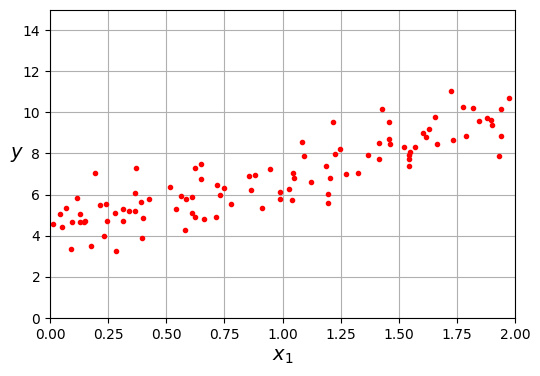

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "r.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [ ]:
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6],[7,8]])

result= matrix_a @ matrix_b
result1 = np.dot(matrix_a,matrix_b)

print("matrix_1")
print(matrix_a)
print('matrix_b')
print(matrix_b)
print('@ istifade etmekle ')
print(result)
print('np.dot dan istifade etmekle')
print(result1)

matrix_1
[[1 2]
 [3 4]]
matrix_b
[[5 6]
 [7 8]]
@ istifade etmekle 
[[19 22]
 [43 50]]
np.dot dan istifade etmekle
[[19 22]
 [43 50]]


In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T@X_b) @ X_b.T @y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

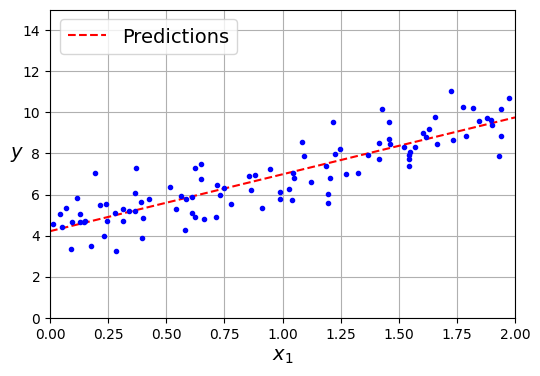

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict, "r--", label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show();

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#Gradient Descent

In [ ]:
eta = 0.1
n_epochs = 1000
X_new_b
m= len(X_b)
np.random.seed(42)
theta =np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 1/m*2*X_b.T @(X_b @ theta - y)
  theta = theta - eta*gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

#Stochastic Gradient Descent

In [ ]:
np.random.seed(42)
eta =0.1
m= len(X_b)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index +1 ]
    yi = y[random_index : random_index + 1]
    gradients = 2*xi.T@(xi@theta-yi)
    theta = theta - eta* gradients
#gradients = 1/m*2*X_b.T @(X_b @ theta - y)
#theta = theta - eta*gradients

In [ ]:
theta

array([[4.17686315],
       [2.85986577]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 1000,tol=1e-5, penalty=None, eta0= 0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#Mini-batch gradient descent

In [ ]:
from math import ceil
n_epochs = 50
eta = 0.1
minibatch_size = 20
n_batches_per_epoch = ceil(m/minibatch_size)

np.random.seed(42)
thetan=np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx = iteration*minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2/minibatch_size*xi.T@(xi@theta-yi)
    theta = theta - eta*gradients

In [ ]:
theta

array([[4.22034332],
       [2.77035765]])

#Polynomial Regression

In [ ]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X + 2 + np.random.randn(m,1)

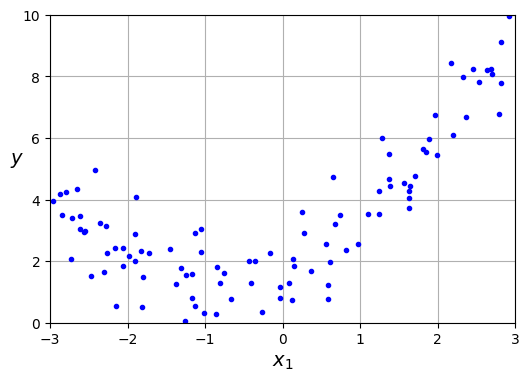

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [ ]:
X_new = np.array([[-3],[3]])
X_preds=lin_reg.predict(X_new)
X_preds

array([[1.03315352],
       [6.09487734]])

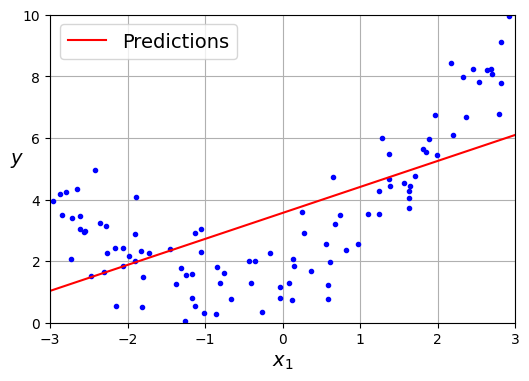

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.plot(X_new, X_preds, "r-",label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
from sklearn.pipeline import make_pipeline
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

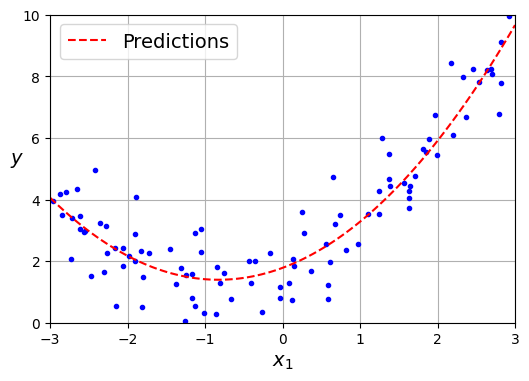

In [ ]:
X_pred = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.plot(X_pred, y_pred, "r--",label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

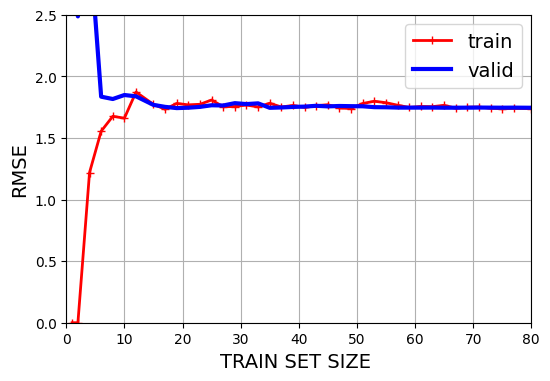

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("TRAIN SET SIZE ")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])

plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree= 10, include_bias=False),
    LinearRegression())

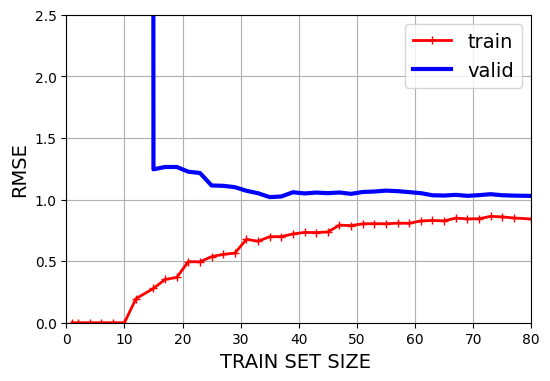

In [ ]:

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("TRAIN SET SIZE ")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])

plt.show()

#Regularized Linear Models


#Ridge Regression



In [ ]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y= 1+0.5*X+ np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

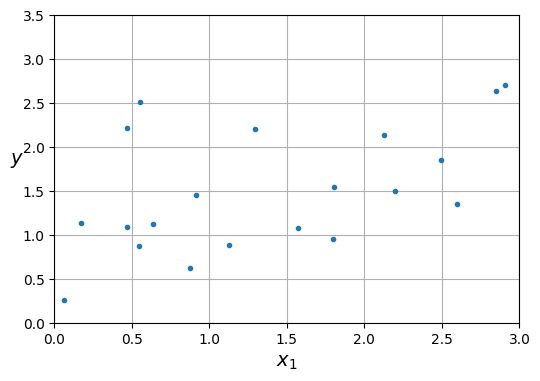

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,".")
plt.xlabel("$x_1$")
plt.ylabel("$y$ ", rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
ridge_reg = Ridge(alpha =0.1 , solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

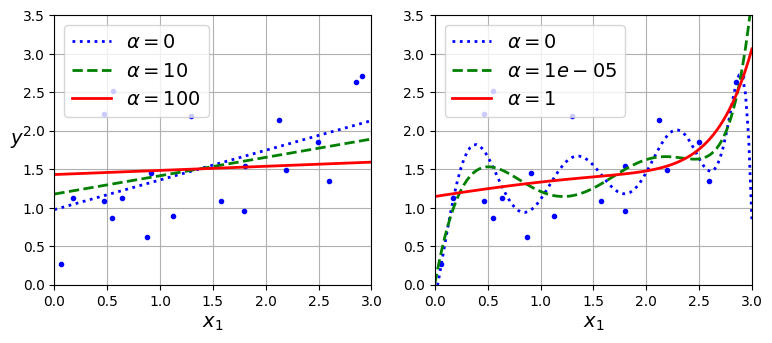

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
  plt.plot(X,y,"b.", linewidth=3)
  for alpha, style in zip(alphas, ("b:", "g--", "r-")):
    if alpha>0:
      model=model_class(alpha, **model_kwargs)
    else:
      model=LinearRegression()
    if polynomial:
      model = make_pipeline(
          PolynomialFeatures(degree=10, include_bias=False),
          StandardScaler(),
          model)
    model.fit(X,y)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul,style, linewidth=2,
             label=fr"$\alpha = {alpha}$")

  plt.legend(loc="upper left")
  plt.xlabel("$x_1$")
  plt.axis([0,3,0,3.5])
  plt.grid()

plt.figure(figsize=(9,3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100),random_state=42)
plt.ylabel("$y$ ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,10**-5,1), random_state=42)
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2",
                       max_iter=1000, eta0 = 0.01, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [ ]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha =0.1 , solver="sag")
ridge_reg.fit(X,y.ravel())
ridge_reg.predict([[1.5]])

array([1.55327639])

In [ ]:
alpha = 0.1
A = np.array([[0., 0.], [0.,1.]])
X_b = np.c_[np.ones(m),X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T@y

array([[0.97898394],
       [0.3828496 ]])

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_

(0.9787885251840569, array([0.38299191]))

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

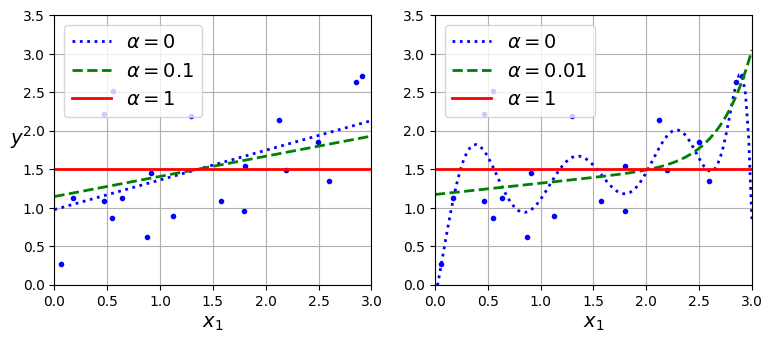

In [ ]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$ ", rotation = 0)
plt.subplot(122)
plot_model(Lasso,polynomial=True, alphas=(0,1e-2,1), random_state=42)
plt.show()

#Elastic NET

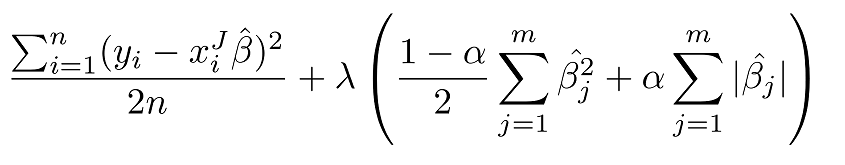[link text](https://)





In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio= 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

#Logistic Regression

#Estimating Probabilities

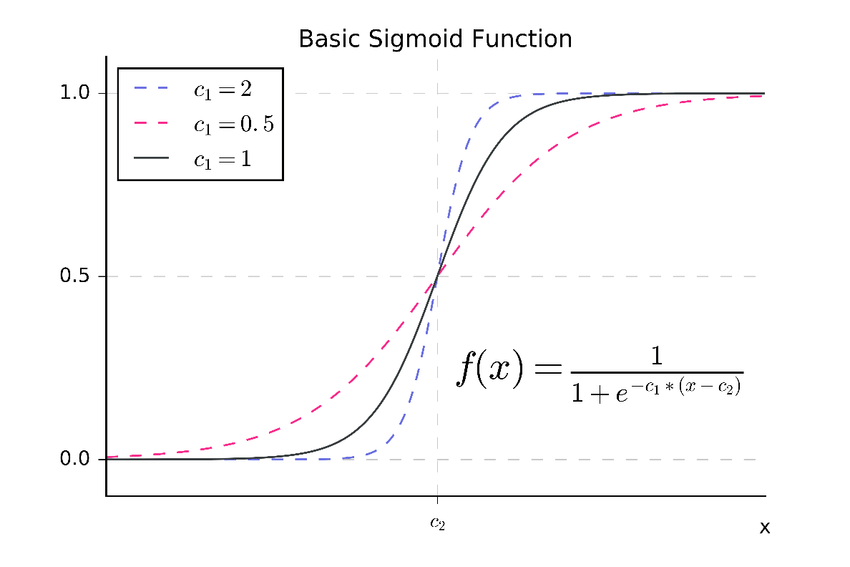[link text](https://)

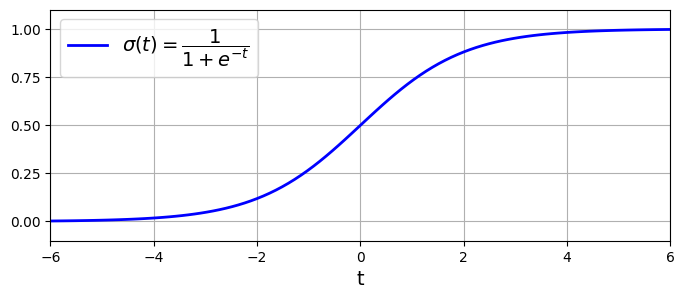

In [ ]:
lim=6
t= np.linspace(-lim,lim,100)
sig= 1/(1 + np.exp(-t))

plt.figure(figsize=(8,3))
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t)=\dfrac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim,lim,-0.1, 1.1])
plt.gca().set_yticks([0,0.25,0.5,0.75,1])
plt.grid()
plt.show()

#Decision boundary

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame= True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y= iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

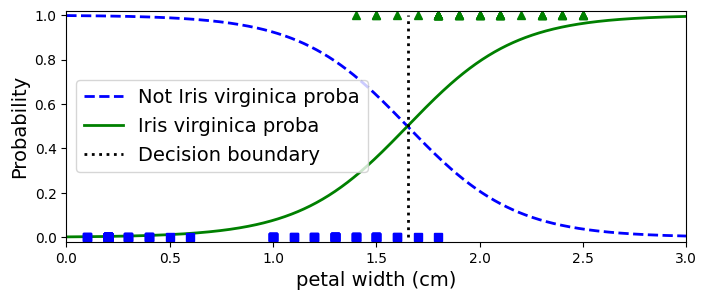

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

plt.figure(figsize=(8,3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth=2,
         label="Decision boundary")

plt.plot(X_train[y_train == 0],y_train[y_train ==0], "bs")
plt.plot(X_train[y_train==1], y_train[y_train==1], "g^")

plt.xlabel("petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0,3,-0.02,1.02])
plt.show()